# Customer Segmentation Using K-Means Clustering

## 1. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

## 2. Data Preprocessing

In [2]:
# load data
df = pd.read_csv("Mall_Customers.csv")

In [3]:
print("\n Sample Data")
df.head()


 Sample Data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("\n Data Shape: ", df.shape)


 Data Shape:  (200, 5)


In [5]:
print("\n Column names and types: ")
df.info()


 Column names and types: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
print("\n Data Statistics: ")
df.describe()


 Data Statistics: 


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Check for missing values
print("\n Null Values")
df.isnull().sum()


 Null Values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df = df.drop(["CustomerID"], axis = 1)

In [9]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [10]:
# Encode categorical variables
df["Gender"] = df["Gender"].map({"Male":0, "Female":1})

In [11]:
df["Gender"]

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [12]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## 3. Exploratore Data Analysis

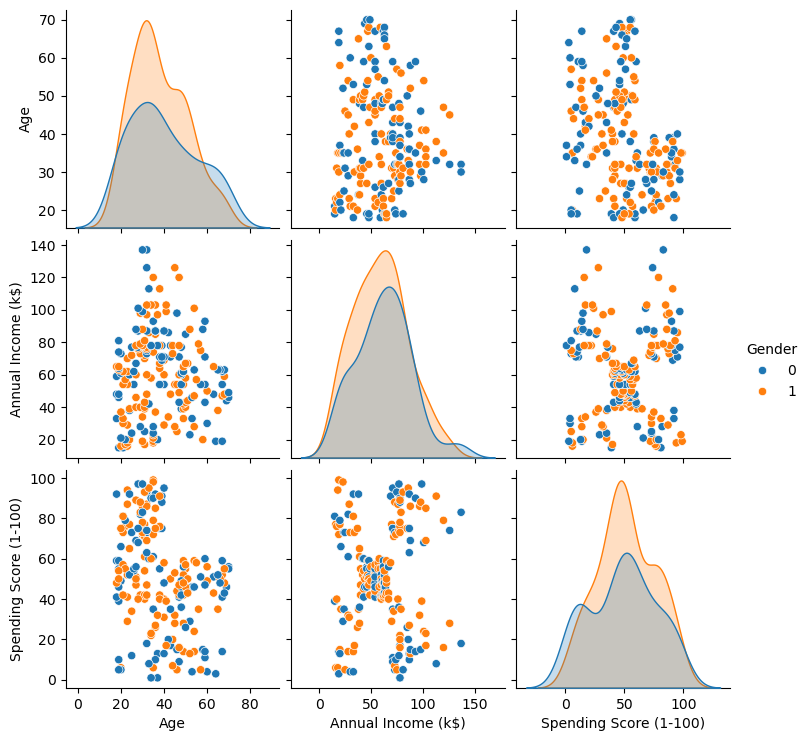

In [13]:
# Pair plot 
sns.pairplot(df, hue="Gender")
plt.show()

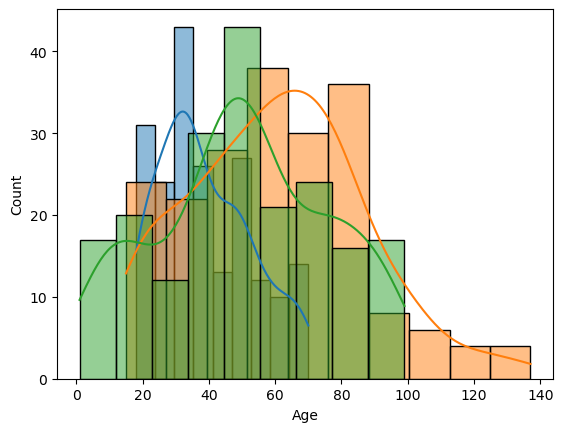

In [14]:
# distribution
sns.histplot(df["Age"], kde=True)
sns.histplot(df["Annual Income (k$)"], kde=True)
sns.histplot(df["Spending Score (1-100)"], kde=True)
plt.show();

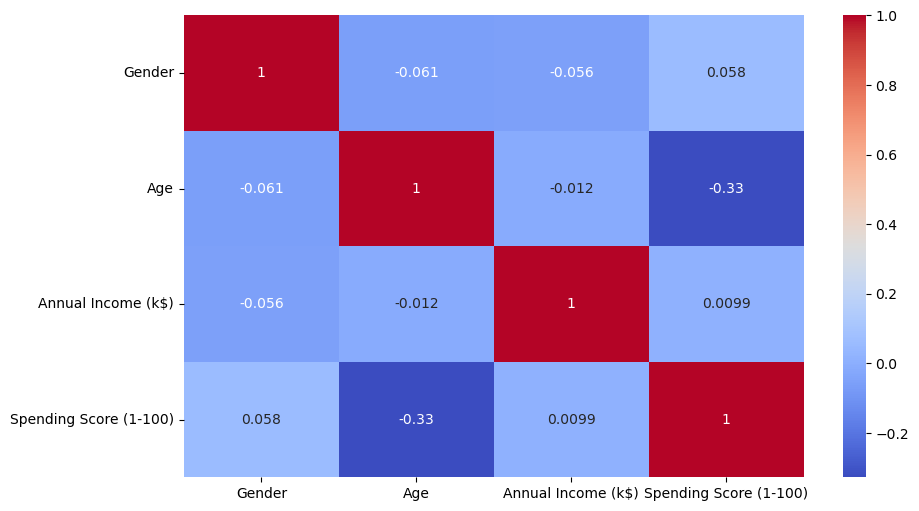

In [15]:
# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show();

## 4. Clustering

In [16]:
# Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)


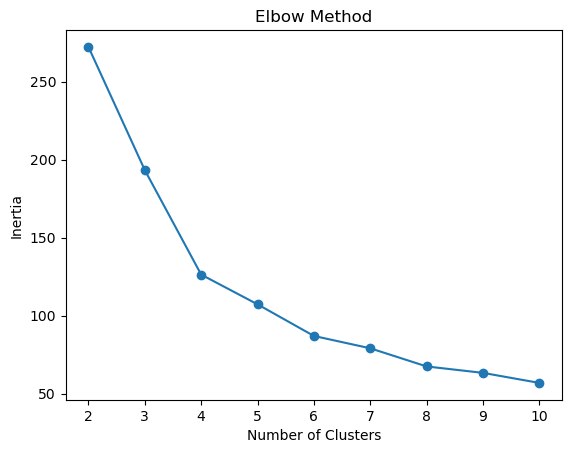

In [17]:
# Check for optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show();

In [18]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(reduced_df)

df["Cluster"] = clusters


## 5. Visualizations

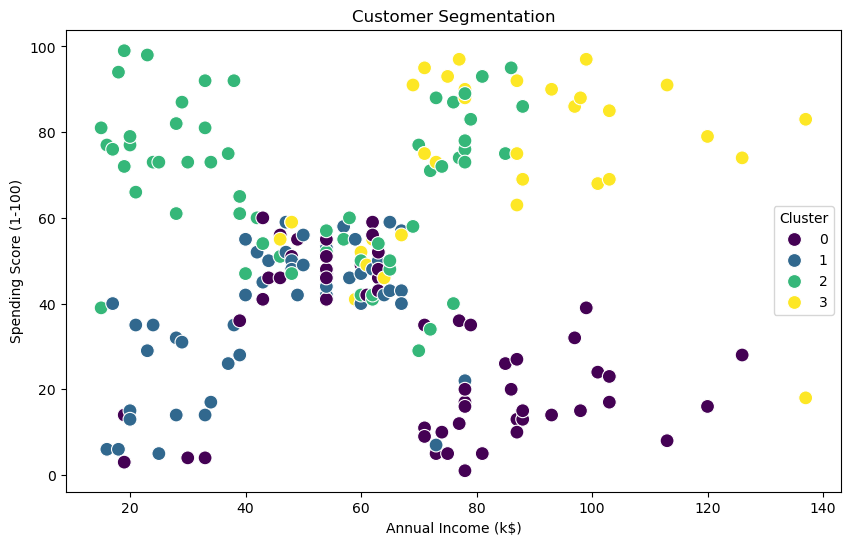

In [19]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df["Cluster"], palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.savefig("customer_1.png")
plt.show()

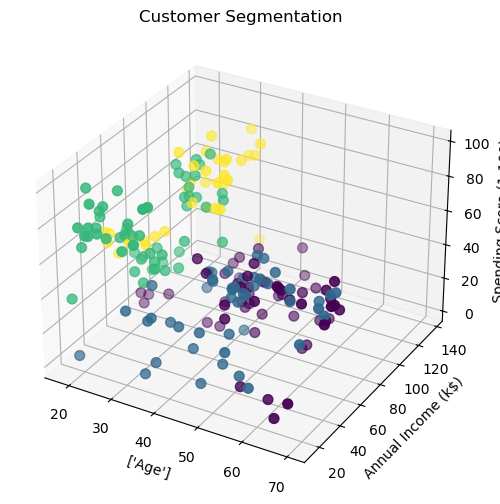

In [20]:
# 3D visualiazation
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation')
ax.set_xlabel(['Age'])
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.savefig("customer_2.png")
plt.show()

## 6. Evaluation

In [21]:
print(f"Model Inertia: {kmeans.inertia_}")

Model Inertia: 126.25924243545296


In [22]:
sil_score = silhouette_score(reduced_df, df["Cluster"])
print(f"PCA Silhouette Score: {sil_score} ")

PCA Silhouette Score: 0.41232054007640784 


In [23]:
print(df['Cluster'].value_counts())

Cluster
2    60
0    58
1    47
3    35
Name: count, dtype: int64


In [24]:
centroids = kmeans.cluster_centers_
print('Cluster Centroids:')
print(centroids)

Cluster Centroids:
[[ 1.23759459  0.54725083]
 [ 0.59241726 -1.03870988]
 [-1.16509041 -0.47558066]
 [-0.84910495  1.30324731]]


In [25]:
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster} ")
    print(df[df['Cluster'] == cluster].describe())

Cluster 2 
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  60.000000  60.000000           60.000000               60.000000   
mean    0.816667  27.233333           49.983333               67.933333   
std     0.390205   5.585595           23.037546               18.009288   
min     0.000000  18.000000           15.000000               29.000000   
25%     1.000000  22.750000           28.750000               53.500000   
50%     1.000000  27.500000           51.000000               73.000000   
75%     1.000000  31.000000           72.000000               81.000000   
max     1.000000  40.000000           88.000000               99.000000   

       Cluster  
count     60.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0  
Cluster 1 
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
count  47.000000  47.000000           47.000000               47.000000   

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,1
3,1,23,16,77,2
4,1,31,17,40,1


In [28]:
df.to_csv('customer_segmentation_with_labels.csv', index=False)